In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import glob
import os
import pickle
import matplotlib

In [3]:
trial_pair=[]
while len(trial_pair)<20:
    i=np.random.randint(0,20)
    if i not in trial_pair:
        trial_pair.append(i)
trial_pair=np.array(trial_pair).reshape(10,2)
trials=[f'0{i}' for i in range(1,10)]+[f'{i}' for i in range(10,21)]
mdm2_nat=md.load('./mdm2_p53.pdb')
mdm2_dis = np.linalg.norm(np.average(mdm2_nat.xyz[0][mdm2_nat.top.select('chainid 0 and name CA and resid 30 to 37 or resid 46 to 47 or resid 67 to 69')],axis=0)-np.average(mdm2_nat.xyz[0][mdm2_nat.top.select('chainid 1 and name CA')],axis=0))
mdmx_nat=md.load('./mdmx_p53.pdb')
mdmx_dis = np.linalg.norm(np.average(mdmx_nat.xyz[0][mdmx_nat.top.select('chainid 0 and name CA and resid 30 to 40 or resid 70 to 73 or resid 49 to 50')],axis=0)-np.average(mdmx_nat.xyz[0][mdmx_nat.top.select('chainid 1 and name CA')],axis=0))
binder=['p53','6N','6W8S9S','6W9S','PDI','6W','6W8S','1E6W','6W11L','pMI','PDIQ']
binder_seq = ['ETFSDLWKLLPE','LTFEHNWAQLTS','LTFEHWWSSLTS','LTFEHWWASLTS','LTFEHYWAQLTS','LTFEHWWAQLTS','LTFEHWWSQLTS','ETFEHWWAQLTS','LTFEHWWAQLLS','TSFAEYWNLLSP','ETFEHWWSQLLS']
mdm2_dis = [mdm2_dis]*11
mdmx_dis = [mdmx_dis]*11
# mdm2_dis


In [171]:
results={}
trials=[f'0{i}' for i in range(1,10)]+[f'{i}' for i in range(10,21)]
for bb in range(11):
#     for bbb in range(bb+1,11):
    target = binder[bb]+'_mdm2'
    for trial in trials:
        all_seq = glob.glob(target+'/result_d_msa_uniref_mono_'+trial+'/seq_d_unrelaxed_rank_*_model_*pdb')
        b_dis=[]
        c_dis=[]
        print(f'--------------{ target, trial }----------------')
        for i in all_seq:
            a=md.load(i)
            chain0=a.top.to_fasta()[0]
            chain1=a.top.to_fasta()[1]
            chain2=a.top.to_fasta()[2]
            b=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'name CA and (resid {len(chain0)+len(chain1)+30} to {len(chain0)+len(chain1)+37}) or (resid {len(chain0)+len(chain1)+46} to {len(chain0)+len(chain1)+47}) or (resid {len(chain0)+len(chain1)+67} to {len(chain0)+len(chain1)+69})')],axis=0)-np.average(a.xyz[0][a.top.select('chainid 0 and name CA')],axis=0))
            c=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'name CA and (resid {len(chain0)+len(chain1)+30} to {len(chain0)+len(chain1)+37}) or (resid {len(chain0)+len(chain1)+46} to {len(chain0)+len(chain1)+47}) or (resid {len(chain0)+len(chain1)+67} to {len(chain0)+len(chain1)+69})')],axis=0)-np.average(a.xyz[0][a.top.select('chainid 1 and name CA')],axis=0))
            b_dis.append(round(abs(b-mdm2_dis[binder_seq.index(chain0)]),3))
            c_dis.append(round(abs(c-mdm2_dis[binder_seq.index(chain1)]),3))
#             if binder_seq.index(chain0) > binder_seq.index(chain1):
            results[f'{binder[binder_seq.index(chain0)]}_{trial}']=[b_dis,c_dis]
#             else:
#                 results[f'{binder[binder_seq.index(chain2)]}_{binder[binder_seq.index(chain0)]}_{trial}']=[c_dis,b_dis]
    print(results)


--------------('p53_mdm2', '01')----------------
--------------('p53_mdm2', '02')----------------
--------------('p53_mdm2', '03')----------------
--------------('p53_mdm2', '04')----------------
--------------('p53_mdm2', '05')----------------
--------------('p53_mdm2', '06')----------------
--------------('p53_mdm2', '07')----------------
--------------('p53_mdm2', '08')----------------
--------------('p53_mdm2', '09')----------------
--------------('p53_mdm2', '10')----------------
--------------('p53_mdm2', '11')----------------
--------------('p53_mdm2', '12')----------------
--------------('p53_mdm2', '13')----------------
--------------('p53_mdm2', '14')----------------
--------------('p53_mdm2', '15')----------------
--------------('p53_mdm2', '16')----------------
--------------('p53_mdm2', '17')----------------
--------------('p53_mdm2', '18')----------------
--------------('p53_mdm2', '19')----------------
--------------('p53_mdm2', '20')----------------
{'p53_01': [[1.343, 

--------------('6W9S_mdm2', '02')----------------
--------------('6W9S_mdm2', '03')----------------
--------------('6W9S_mdm2', '04')----------------
--------------('6W9S_mdm2', '05')----------------
--------------('6W9S_mdm2', '06')----------------
--------------('6W9S_mdm2', '07')----------------
--------------('6W9S_mdm2', '08')----------------
--------------('6W9S_mdm2', '09')----------------
--------------('6W9S_mdm2', '10')----------------
--------------('6W9S_mdm2', '11')----------------
--------------('6W9S_mdm2', '12')----------------
--------------('6W9S_mdm2', '13')----------------
--------------('6W9S_mdm2', '14')----------------
--------------('6W9S_mdm2', '15')----------------
--------------('6W9S_mdm2', '16')----------------
--------------('6W9S_mdm2', '17')----------------
--------------('6W9S_mdm2', '18')----------------
--------------('6W9S_mdm2', '19')----------------
--------------('6W9S_mdm2', '20')----------------
{'p53_01': [[1.343, 1.013, 0.039, 1.105, 0.045], [

--------------('PDI_mdm2', '09')----------------
--------------('PDI_mdm2', '10')----------------
--------------('PDI_mdm2', '11')----------------
--------------('PDI_mdm2', '12')----------------
--------------('PDI_mdm2', '13')----------------
--------------('PDI_mdm2', '14')----------------
--------------('PDI_mdm2', '15')----------------
--------------('PDI_mdm2', '16')----------------
--------------('PDI_mdm2', '17')----------------
--------------('PDI_mdm2', '18')----------------
--------------('PDI_mdm2', '19')----------------
--------------('PDI_mdm2', '20')----------------
{'p53_01': [[1.343, 1.013, 0.039, 1.105, 0.045], [0.053, 0.041, 1.036, 0.211, 1.154]], 'p53_02': [[0.458, 1.018, 0.848, 0.076, 0.414], [0.327, 0.038, 0.349, 1.197, 0.847]], 'p53_03': [[1.034, 0.079, 0.992, 1.02, 1.366], [0.035, 1.139, 0.22, 0.024, 0.064]], 'p53_04': [[1.264, 0.051, 0.037, 0.028, 1.008], [0.049, 1.036, 1.043, 1.181, 0.028]], 'p53_05': [[1.029, 1.008, 1.024, 1.452, 0.862], [0.036, 0.165, 0.042,

--------------('6W_mdm2', '02')----------------
--------------('6W_mdm2', '03')----------------
--------------('6W_mdm2', '04')----------------
--------------('6W_mdm2', '05')----------------
--------------('6W_mdm2', '06')----------------
--------------('6W_mdm2', '07')----------------
--------------('6W_mdm2', '08')----------------
--------------('6W_mdm2', '09')----------------
--------------('6W_mdm2', '10')----------------
--------------('6W_mdm2', '11')----------------
--------------('6W_mdm2', '12')----------------
--------------('6W_mdm2', '13')----------------
--------------('6W_mdm2', '14')----------------
--------------('6W_mdm2', '15')----------------
--------------('6W_mdm2', '16')----------------
--------------('6W_mdm2', '17')----------------
--------------('6W_mdm2', '18')----------------
--------------('6W_mdm2', '19')----------------
--------------('6W_mdm2', '20')----------------
{'p53_01': [[1.343, 1.013, 0.039, 1.105, 0.045], [0.053, 0.041, 1.036, 0.211, 1.154]], '

--------------('6W8S_mdm2', '02')----------------
--------------('6W8S_mdm2', '03')----------------
--------------('6W8S_mdm2', '04')----------------
--------------('6W8S_mdm2', '05')----------------
--------------('6W8S_mdm2', '06')----------------
--------------('6W8S_mdm2', '07')----------------
--------------('6W8S_mdm2', '08')----------------
--------------('6W8S_mdm2', '09')----------------
--------------('6W8S_mdm2', '10')----------------
--------------('6W8S_mdm2', '11')----------------
--------------('6W8S_mdm2', '12')----------------
--------------('6W8S_mdm2', '13')----------------
--------------('6W8S_mdm2', '14')----------------
--------------('6W8S_mdm2', '15')----------------
--------------('6W8S_mdm2', '16')----------------
--------------('6W8S_mdm2', '17')----------------
--------------('6W8S_mdm2', '18')----------------
--------------('6W8S_mdm2', '19')----------------
--------------('6W8S_mdm2', '20')----------------
{'p53_01': [[1.343, 1.013, 0.039, 1.105, 0.045], [

--------------('1E6W_mdm2', '02')----------------
--------------('1E6W_mdm2', '03')----------------
--------------('1E6W_mdm2', '04')----------------
--------------('1E6W_mdm2', '05')----------------
--------------('1E6W_mdm2', '06')----------------
--------------('1E6W_mdm2', '07')----------------
--------------('1E6W_mdm2', '08')----------------
--------------('1E6W_mdm2', '09')----------------
--------------('1E6W_mdm2', '10')----------------
--------------('1E6W_mdm2', '11')----------------
--------------('1E6W_mdm2', '12')----------------
--------------('1E6W_mdm2', '13')----------------
--------------('1E6W_mdm2', '14')----------------
--------------('1E6W_mdm2', '15')----------------
--------------('1E6W_mdm2', '16')----------------
--------------('1E6W_mdm2', '17')----------------
--------------('1E6W_mdm2', '18')----------------
--------------('1E6W_mdm2', '19')----------------
--------------('1E6W_mdm2', '20')----------------
{'p53_01': [[1.343, 1.013, 0.039, 1.105, 0.045], [

--------------('6W11L_mdm2', '02')----------------
--------------('6W11L_mdm2', '03')----------------
--------------('6W11L_mdm2', '04')----------------
--------------('6W11L_mdm2', '05')----------------
--------------('6W11L_mdm2', '06')----------------
--------------('6W11L_mdm2', '07')----------------
--------------('6W11L_mdm2', '08')----------------
--------------('6W11L_mdm2', '09')----------------
--------------('6W11L_mdm2', '10')----------------
--------------('6W11L_mdm2', '11')----------------
--------------('6W11L_mdm2', '12')----------------
--------------('6W11L_mdm2', '13')----------------
--------------('6W11L_mdm2', '14')----------------
--------------('6W11L_mdm2', '15')----------------
--------------('6W11L_mdm2', '16')----------------
--------------('6W11L_mdm2', '17')----------------
--------------('6W11L_mdm2', '18')----------------
--------------('6W11L_mdm2', '19')----------------
--------------('6W11L_mdm2', '20')----------------
{'p53_01': [[1.343, 1.013, 0.03

--------------('pMI_mdm2', '02')----------------
--------------('pMI_mdm2', '03')----------------
--------------('pMI_mdm2', '04')----------------
--------------('pMI_mdm2', '05')----------------
--------------('pMI_mdm2', '06')----------------
--------------('pMI_mdm2', '07')----------------
--------------('pMI_mdm2', '08')----------------
--------------('pMI_mdm2', '09')----------------
--------------('pMI_mdm2', '10')----------------
--------------('pMI_mdm2', '11')----------------
--------------('pMI_mdm2', '12')----------------
--------------('pMI_mdm2', '13')----------------
--------------('pMI_mdm2', '14')----------------
--------------('pMI_mdm2', '15')----------------
--------------('pMI_mdm2', '16')----------------
--------------('pMI_mdm2', '17')----------------
--------------('pMI_mdm2', '18')----------------
--------------('pMI_mdm2', '19')----------------
--------------('pMI_mdm2', '20')----------------
{'p53_01': [[1.343, 1.013, 0.039, 1.105, 0.045], [0.053, 0.041, 1.036

--------------('PDIQ_mdm2', '02')----------------
--------------('PDIQ_mdm2', '03')----------------
--------------('PDIQ_mdm2', '04')----------------
--------------('PDIQ_mdm2', '05')----------------
--------------('PDIQ_mdm2', '06')----------------
--------------('PDIQ_mdm2', '07')----------------
--------------('PDIQ_mdm2', '08')----------------
--------------('PDIQ_mdm2', '09')----------------
--------------('PDIQ_mdm2', '10')----------------
--------------('PDIQ_mdm2', '11')----------------
--------------('PDIQ_mdm2', '12')----------------
--------------('PDIQ_mdm2', '13')----------------
--------------('PDIQ_mdm2', '14')----------------
--------------('PDIQ_mdm2', '15')----------------
--------------('PDIQ_mdm2', '16')----------------
--------------('PDIQ_mdm2', '17')----------------
--------------('PDIQ_mdm2', '18')----------------
--------------('PDIQ_mdm2', '19')----------------
--------------('PDIQ_mdm2', '20')----------------
{'p53_01': [[1.343, 1.013, 0.039, 1.105, 0.045], [

[6, 4, 1, 5, 2, 7, 4, 4, 5, 5] [2, 4, 7, 3, 5, 1, 2, 6, 2, 4]
[7, 5, 6, 6, 5, 9, 9, 4, 2, 1] [3, 5, 4, 4, 5, 1, 1, 6, 8, 9]
[6, 3, 4, 5, 4, 5, 3, 7, 5, 5] [2, 4, 3, 3, 4, 3, 5, 2, 3, 3]
[4, 3, 4, 3, 1, 5, 4, 4, 1, 1] [3, 4, 3, 3, 7, 2, 4, 3, 4, 5]
[0, 4, 10, 3, 3, 4, 1, 3, 8, 4] [10, 6, 0, 7, 7, 6, 9, 7, 2, 6]
[3, 6, 6, 4, 5, 3, 6, 6, 4, 4] [5, 2, 3, 4, 5, 7, 3, 2, 4, 4]
[5, 3, 9, 7, 8, 5, 8, 5, 2, 6] [5, 7, 1, 3, 2, 5, 1, 4, 7, 4]
[5, 1, 6, 5, 3, 3, 1, 8, 5, 3] [5, 9, 4, 5, 7, 7, 9, 2, 5, 7]
[4, 2, 1, 2, 0, 3, 4, 2, 5, 5] [6, 8, 9, 8, 10, 7, 6, 8, 5, 5]
[2, 5, 6, 7, 3, 3, 3, 5, 2, 4] [8, 5, 3, 3, 7, 7, 7, 5, 8, 6]
[5, 0, 2, 9, 2, 0, 3, 1, 1, 5] [5, 10, 8, 1, 8, 10, 7, 9, 9, 5]
jjj [[0.75  0.5   0.125 0.625 0.286 0.875 0.667 0.4   0.714 0.556]
 [0.7   0.5   0.6   0.6   0.5   0.9   0.9   0.4   0.2   0.1  ]
 [0.75  0.429 0.571 0.625 0.5   0.625 0.375 0.778 0.625 0.625]
 [0.571 0.429 0.571 0.5   0.125 0.714 0.5   0.571 0.2   0.167]
 [0.    0.4   1.    0.3   0.3   0.4   0.1   0.3   0.8   0

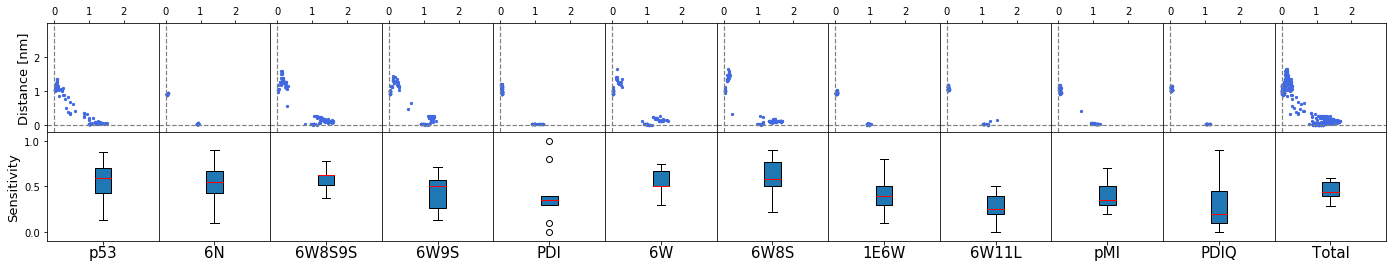

In [35]:
bet_result=pickle.load(open('mdm2_d_msa_uniref_result.pkl', 'rb'))
fig,ax=plt.subplots(2,12,figsize=(24,4))
all_binder_0 = []
all_binder_1 = []
all_TF = []
all_T=[]
all_F=[]
for bb in range(11):
#     for bbb in range(bb+1,11):
    target = binder[bb]
    tmp_T=[]
    tmp_F=[]
    binder_0=[]
    binder_1=[]
    for i in trial_pair:
        binder_0.append(bet_result[f'{target}_'+trials[i[0]]][0])
        binder_0.append(bet_result[f'{target}_'+trials[i[1]]][0])
        binder_1.append(bet_result[f'{target}_'+trials[i[0]]][1])
        binder_1.append(bet_result[f'{target}_'+trials[i[1]]][1])
        tmp_F.append((np.concatenate((bet_result[f'{target}_'+trials[i[0]]][0],bet_result[f'{target}_'+trials[i[1]]][0]))[np.concatenate((bet_result[f'{target}_'+trials[i[0]]][1],bet_result[f'{target}_'+trials[i[1]]][1]))>0.3]<0.2).sum())
        tmp_T.append((np.concatenate((bet_result[f'{target}_'+trials[i[0]]][1],bet_result[f'{target}_'+trials[i[1]]][1]))[np.concatenate((bet_result[f'{target}_'+trials[i[0]]][0],bet_result[f'{target}_'+trials[i[1]]][0]))>0.3]<0.2).sum())
    print(tmp_T,tmp_F)
    all_binder_0.append(binder_0)
    all_binder_1.append(binder_1)
    all_T.append(tmp_T)
    all_F.append(tmp_F)
    tmp_TF=np.round(np.array(tmp_T/(np.array(tmp_T)+np.array(tmp_F))),3)
    binder_0=np.concatenate(binder_0)
    binder_1=np.concatenate(binder_1)
    all_TF.append(tmp_TF)
#         print(target,tmp_T,tmp_F,np.round(np.average(tmp_TF),2),np.round(np.std(tmp_TF),2))
    ax[1][bb].yaxis.tick_right()
    box=ax[1][bb].boxplot(tmp_TF,patch_artist=True)
    ax[1][bb].set_xlim(0.5,1.5)
    ax[1][bb].set_ylim(-0.1,1.1)
    ax[1][bb].set_yticks([0,0.5,1])
#         ax[5-bb][bbb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
#         ax[bb][5-bbb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
#         ax1,ax2 = ax[bb][5-bbb].twinx(), ax[bb][5-bbb].twiny()

    ax[0][bb].scatter(binder_0,binder_1,c='royalblue',edgecolor='royalblue',s=5)
#         ax1.yaxis.tick_left()
    ax[0][bb].set_xlim(-0.2,3)
    ax[0][bb].set_ylim(-0.2,3)
    ax[0][bb].set_yticks([0,1,2])
    ax[0][bb].set_xticks([0,1,2])
    ax[0][bb].xaxis.tick_top()
    ax[0][bb].plot([0,0],[-0.2,3],'--',color='gray',linewidth=1.2)
    ax[0][bb].plot([-0.2,3],[0,0],'--',color='gray',linewidth=1.2)
#         if bb!=0:
#             ax[10-bbb][bb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
#         if bbb!=10:
#             ax[10-bbb][bb].tick_params(axis='x',which='both',left=False,right=False,top=False,bottom=False,labeltop=False,labelleft=False,labelright=False)
    for patch in box['boxes']:
        patch.set(color='k')
        patch.set(facecolor = 'C0' )
    for median in box['medians']: 
        median.set(color ='red', linewidth = 1) 
#     ax[1][bb].plot([0.5,1.5],[0.5,0.5],'--',color='lightgray',linewidth=1.2)
#         ax[5-bb][bbb].scatter([1]*tmp_TF.shape[0],tmp_TF,s=10,color='r',edgecolors='k',linewidths=1)
for i in range(12):
    ax[0][i].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False,labelbottom=False)
    ax[0][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,top=True,labeltop=True,labelleft=False,labelright=False,labelbottom=False)
    ax[0][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)
    ax[1][i].tick_params(axis='x',which='both',left=False,right=False,bottom=True,labelleft=False,labelright=False,labelbottom=False)
    ax[1][i].tick_params(axis='y',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)

ax[0][11].scatter(np.concatenate(all_binder_0),np.concatenate(all_binder_1),c='royalblue',edgecolor='royalblue',s=5)
all_TF=np.sum(all_T,axis=1)/(np.sum(all_F,axis=1)+np.sum(all_T,axis=1))#np.round(np.array(all_T/(np.array(all_T)+np.array(all_F))),3)
box=ax[1][11].boxplot(np.sum(all_T,axis=1)/(np.sum(all_F,axis=1)+np.sum(all_T,axis=1)),patch_artist=True)
ax[0][11].xaxis.tick_top()
ax[0][11].set_xlim(-0.2,3)
ax[0][11].set_ylim(-0.2,3)
ax[0][11].set_yticks([0,1,2])
ax[0][11].set_xticks([0,1,2])
ax[0][11].plot([0,0],[-0.2,3],'--',color='gray',linewidth=1.2)
ax[0][11].plot([-0.2,3],[0,0],'--',color='gray',linewidth=1.2)
ax[1][11].set_xlabel('Total',fontsize=15)
ax[1][11].set_ylim(-0.1,1.1)
# ax[1][11].plot([0.5,1.5],[0.5,0.5],'--',color='lightgray',linewidth=1.2)
for patch in box['boxes']:
    patch.set(color='k')
    patch.set(facecolor = 'C0' )
for median in box['medians']: 
    median.set(color ='red', linewidth = 1) 
# rect = ax[1][9].patch
# rect.set_facecolor('lightgray')
print('jjj',np.round(np.array(all_T/(np.array(all_T)+np.array(all_F))),3))
for bb in range(11):
    ax[1][bb].set_xlabel(binder[bb],fontsize=15)
ax[0][0].tick_params(axis='y',left=True,right=False,bottom=True,labelleft=True,labelright=False,labelbottom=True)
ax[0][0].set_ylabel('Distance [nm]',fontsize=13)
ax[1][0].tick_params(axis='y',left=True,right=False,bottom=True,labelleft=True,labelright=False,labelbottom=True)
ax[1][0].set_ylabel('Sensitivity',fontsize=13)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('./mdm2_d_uniref_mono_result.pdf',bbox_inches='tight')



In [19]:
bet_result=pickle.load(open('mdm2_uniref_mono_result.pkl', 'rb'))
len(bet_result)
# for bb in range(11):
#     for bbb in range(bb+1,11):
#         target = binder[bbb]+'_'+binder[bb]
#         b_dis=[]
#         c_dis=[]
#         for i in trials:
#             b_dis.append(bet_result[f'{target}_{i}'][0])
#             c_dis.append(bet_result[f'{target}_{i}'][1])
#         b_dis=np.concatenate(b_dis)
#         c_dis=np.concatenate(c_dis)
#         fig,ax=plt.subplots(1,2,figsize=(10,5))
#         ax[0].scatter(b_dis,c_dis,s=10)
#         ax[0].plot([0,0],[-0.1,2],'gray')
#         ax[0].plot([-0.1,2],[0,0],'gray')
#         ax[0].set_xlim(-0.1,3)
#         ax[0].set_ylim(-0.1,3)
#         ax[0].set_xlabel(binder[bbb])
#         ax[0].set_ylabel(binder[bb])
#         hist=ax[1].hist(b_dis,color='blue',bins=5,alpha=0.5)
#         hist=ax[1].hist(c_dis,color='orange',bins=5,alpha=0.5)
#         plt.show()


1100

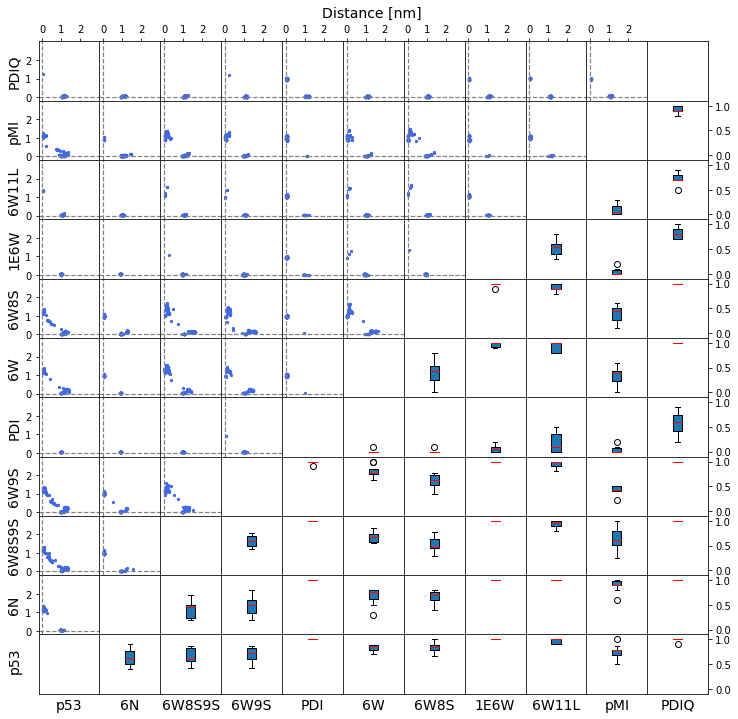

In [72]:
fig,ax=plt.subplots(11,11,figsize=(12,12))
for bb in range(11):
    for bbb in range(bb+1,11):
        target = binder[bbb]+'_'+binder[bb]
        tmp_T=[]
        tmp_F=[]
        binder_0=[]
        binder_1=[]
        for i in trial_pair:
            binder_0.append(bet_result[f'{target}_'+trials[i[0]]][0])
            binder_0.append(bet_result[f'{target}_'+trials[i[1]]][0])
            binder_1.append(bet_result[f'{target}_'+trials[i[0]]][1])
            binder_1.append(bet_result[f'{target}_'+trials[i[1]]][1])
            tmp_T.append((np.concatenate((bet_result[f'{target}_'+trials[i[0]]][0],bet_result[f'{target}_'+trials[i[1]]][0]))[np.concatenate((bet_result[f'{target}_'+trials[i[0]]][1],bet_result[f'{target}_'+trials[i[1]]][1]))>0.3]<0.2).sum())
            tmp_F.append((np.concatenate((bet_result[f'{target}_'+trials[i[0]]][1],bet_result[f'{target}_'+trials[i[1]]][1]))[np.concatenate((bet_result[f'{target}_'+trials[i[0]]][0],bet_result[f'{target}_'+trials[i[1]]][0]))>0.3]<0.2).sum())
        tmp_TF=np.round(np.array(tmp_T/(np.array(tmp_T)+np.array(tmp_F))),3)
        binder_0=np.concatenate(binder_0)
        binder_1=np.concatenate(binder_1)
#         print(target,tmp_T,tmp_F,np.round(np.average(tmp_TF),2),np.round(np.std(tmp_TF),2))
        ax[10-bb][bbb].yaxis.tick_right()
        box=ax[10-bb][bbb].boxplot(tmp_TF,patch_artist=True)
        ax[10-bb][bbb].set_xlim(0.5,1.5)
        ax[10-bb][bbb].set_ylim(-0.1,1.1)
        ax[10-bb][bbb].set_yticks([0,0.5,1])
#         ax[5-bb][bbb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
#         ax[bb][5-bbb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
#         ax1,ax2 = ax[bb][5-bbb].twinx(), ax[bb][5-bbb].twiny()
        
        ax[10-bbb][bb].scatter(binder_1,binder_0,c='royalblue',edgecolor='royalblue',s=5)
#         ax1.yaxis.tick_left()
        ax[10-bbb][bb].set_xlim(-0.2,3)
        ax[10-bbb][bb].set_ylim(-0.2,3)
        ax[10-bbb][bb].set_yticks([0,1,2])
        ax[10-bbb][bb].set_xticks([0,1,2])
        ax[10-bbb][bb].xaxis.tick_top()
        ax[10-bbb][bb].plot([0,0],[-0.2,3],'--',color='gray',linewidth=1.2)
        ax[10-bbb][bb].plot([-0.2,3],[0,0],'--',color='gray',linewidth=1.2)
        if bb!=0:
            ax[10-bbb][bb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
        if bbb!=10:
            ax[10-bbb][bb].tick_params(axis='x',which='both',left=False,right=False,top=False,bottom=False,labeltop=False,labelleft=False,labelright=False)
        for patch in box['boxes']:
            patch.set(color='k')
            patch.set(facecolor = 'C0' )
        for median in box['medians']: 
            median.set(color ='red', linewidth = 1) 
#         ax[5-bb][bbb].scatter([1]*tmp_TF.shape[0],tmp_TF,s=10,color='r',edgecolors='k',linewidths=1)
for i in range(11):
    ax[10-i][i].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False,labelbottom=False)
    ax[10-i][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)
    ax[10][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)

# for i in range(5,11):
#     rect = ax[6][i].patch
#     rect.set_facecolor('lightgray')
# rect = ax[5][2].patch
# rect.set_facecolor('lightgray')
# rect = ax[4][0].patch
# rect.set_facecolor('lightgray')
# rect = ax[3][0].patch
# rect.set_facecolor('lightgray')
# ax[5][0].set_xlim(0.5,1.5)
# ax[5][0].tick_params(axis='x',which='both',left=False,right=False,bottom=True,labelleft=False,labelright=False,labelbottom=True)
# ax[5][0].set_xticks([1])
for bb in range(11):
    ax[10][bb].set_xlabel(binder[bb],fontsize=14)
for bb in range(1,11):
    ax[10-bb][0].set_ylabel(binder[bb],fontsize=14)
ax[10][0].text(-0.5, 0.4,binder[0],fontsize=14,rotation=90)
plt.subplots_adjust(wspace=0, hspace=0)
ax[0][0].text(14.7, 4.3,'Distance [nm]',fontsize=14)
# plt.savefig('./mdm2_uniref_mono_result.pdf',bbox_inches = "tight")


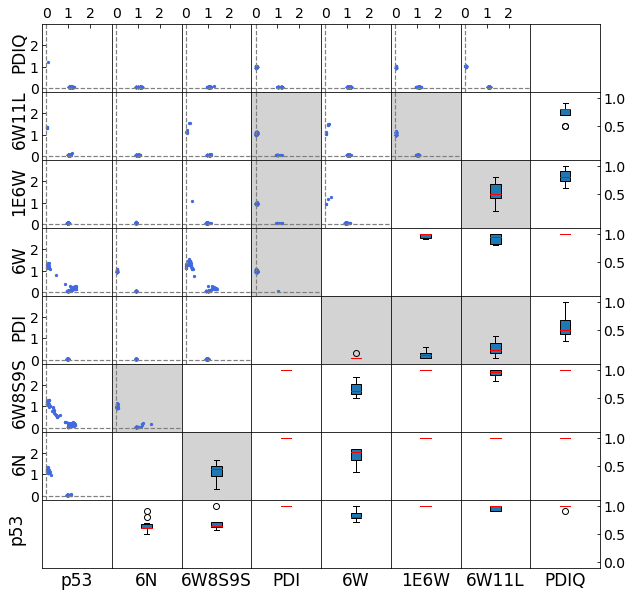

In [68]:
binder=['p53','6N','6W8S9S','PDI','6W','1E6W','6W11L','PDIQ']
binder_seq = ['ETFSDLWKLLPE','LTFEHNWAQLTS','LTFEHWWSSLTS','LTFEHYWAQLTS','LTFEHWWAQLTS','ETFEHWWAQLTS','LTFEHWWAQLLS','ETFEHWWSQLLS']
bet_result=pickle.load(open('mdm2_uniref_mono_result.pkl', 'rb'))
len(bet_result)
fig,ax=plt.subplots(8,8,figsize=(10,10))
for bb in range(7):
    ax[0][bb].tick_params(axis="both",direction="in",labelsize=14)
    ax[bb][0].tick_params(axis="both",direction="in",labelsize=14)
    ax[bb+1][7].tick_params(axis="y",direction="in",labelsize=14)
for bb in range(8):
    for bbb in range(bb+1,8):
        target = binder[bbb]+'_'+binder[bb]
        tmp_T=[]
        tmp_F=[]
        binder_0=[]
        binder_1=[]
        for i in trial_pair:
            binder_0.append(bet_result[f'{target}_'+trials[i[0]]][0])
            binder_0.append(bet_result[f'{target}_'+trials[i[1]]][0])
            binder_1.append(bet_result[f'{target}_'+trials[i[0]]][1])
            binder_1.append(bet_result[f'{target}_'+trials[i[1]]][1])
            tmp_T.append((np.concatenate((bet_result[f'{target}_'+trials[i[0]]][0],bet_result[f'{target}_'+trials[i[1]]][0]))[np.concatenate((bet_result[f'{target}_'+trials[i[0]]][1],bet_result[f'{target}_'+trials[i[1]]][1]))>0.3]<0.2).sum())
            tmp_F.append((np.concatenate((bet_result[f'{target}_'+trials[i[0]]][1],bet_result[f'{target}_'+trials[i[1]]][1]))[np.concatenate((bet_result[f'{target}_'+trials[i[0]]][0],bet_result[f'{target}_'+trials[i[1]]][0]))>0.3]<0.2).sum())
        tmp_TF=np.round(np.array(tmp_T/(np.array(tmp_T)+np.array(tmp_F))),3)
        binder_0=np.concatenate(binder_0)
        binder_1=np.concatenate(binder_1)
#         print(target,tmp_T,tmp_F,np.round(np.average(tmp_TF),2),np.round(np.std(tmp_TF),2))
        ax[7-bb][bbb].yaxis.tick_right()
        box=ax[7-bb][bbb].boxplot(tmp_TF,patch_artist=True)
        ax[7-bb][bbb].set_xlim(0.5,1.5)
        ax[7-bb][bbb].set_ylim(-0.1,1.1)
        ax[7-bb][bbb].set_yticks([0.5,1])
#         ax[5-bb][bbb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
#         ax[bb][5-bbb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
#         ax1,ax2 = ax[bb][5-bbb].twinx(), ax[bb][5-bbb].twiny()
        
        ax[7-bbb][bb].scatter(binder_1,binder_0,c='royalblue',edgecolor='royalblue',s=5)
#         ax1.yaxis.tick_left()
        ax[7-bbb][bb].set_xlim(-0.2,3)
        ax[7-bbb][bb].set_ylim(-0.2,3)
        ax[7-bbb][bb].set_yticks([0,1,2])
        ax[7-bbb][bb].set_xticks([0,1,2])
        ax[7-bbb][bb].xaxis.tick_top()
        ax[7-bbb][bb].plot([0,0],[-0.2,3],'--',color='gray',linewidth=1.2)
        ax[7-bbb][bb].plot([-0.2,3],[0,0],'--',color='gray',linewidth=1.2)
        if bb!=0:
            ax[7-bbb][bb].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False)
        if bbb!=7:
            ax[7-bbb][bb].tick_params(axis='x',which='both',left=False,right=False,top=False,bottom=False,labeltop=False,labelleft=False,labelright=False)
        for patch in box['boxes']:
            patch.set(color='k')
            patch.set(facecolor = 'C0' )
        for median in box['medians']: 
            median.set(color ='red', linewidth = 1) 
#         ax[5-bb][bbb].scatter([1]*tmp_TF.shape[0],tmp_TF,s=10,color='r',edgecolors='k',linewidths=1)
ax[7][7].set_yticks([0,0.5,1])
for i in range(8):
    ax[7-i][i].tick_params(axis='y',which='both',left=False,right=False,labelleft=False,labelright=False,labelbottom=False)
    ax[7-i][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)
    ax[7][i].tick_params(axis='x',which='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)

for i in range(4,7):
    rect = ax[4][i].patch
    rect.set_facecolor('lightgray')
for i in range(1,4):
    rect = ax[i][3].patch
    rect.set_facecolor('lightgray')
       
rect = ax[6][2].patch
rect.set_facecolor('lightgray')
rect = ax[5][1].patch
rect.set_facecolor('lightgray')
rect = ax[2][6].patch
rect.set_facecolor('lightgray')
rect = ax[1][5].patch
rect.set_facecolor('lightgray')
# rect = ax[3][0].patch
# rect.set_facecolor('lightgray')
for bb in range(8):
    ax[7][bb].set_xlabel(binder[bb],fontsize=17)
ax[0][0].text(-1.65, 0.9,binder[7],fontsize=17,rotation=90)
ax[1][0].text(-1.65, 0.55,binder[6],fontsize=17,rotation=90)
ax[2][0].text(-1.65, 0.6,binder[5],fontsize=17,rotation=90)
ax[3][0].text(-1.65, 1.1,binder[4],fontsize=17,rotation=90)
ax[4][0].text(-1.65, 1.07,binder[3],fontsize=17,rotation=90)
ax[5][0].text(-1.65, 0.2,binder[2],fontsize=17,rotation=90)
ax[6][0].text(-1.65, 1.2,binder[1],fontsize=17,rotation=90)
ax[7][0].text(-0.5, 0.4,binder[0],fontsize=17,rotation=90)
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('./mdm2_main_uniref_mono_result.pdf',bbox_inches = "tight")


In [56]:
# for bb in range(11):
#     for bbb in range(bb+1,11):
#         target = binder[bb]+'_'+binder[bbb]+'_mdm2'
#         all_seq = glob.glob(target+'/result_msa_uniref_custom_mono_*/seq_msa_uniref_custom_unrelaxed_rank_*_model_*pdb')
#         b_dis=[]
#         c_dis=[]
#         print(f'--------------{ target }----------------')
#         for i in all_seq:
#             a=md.load(i)
#             chain0=a.top.to_fasta()[0]
#             chain2=a.top.to_fasta()[2]
#             b=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'chainid 1 and name CA and (resid {len(chain0)+30} to {len(chain0)+37}) or (resid {len(chain0)+46} to {len(chain0)+47}) or (resid {len(chain0)+67} to {len(chain0)+69})')],axis=0)-np.average(a.xyz[0][a.top.select('chainid 0 and name CA')],axis=0))
#             c=np.linalg.norm(np.average(a.xyz[0][a.top.select(f'chainid 1 and name CA and (resid {len(chain0)+30} to {len(chain0)+37}) or (resid {len(chain0)+46} to {len(chain0)+47}) or (resid {len(chain0)+67} to {len(chain0)+69})')],axis=0)-np.average(a.xyz[0][a.top.select('chainid 2 and name CA')],axis=0))
#             b_dis.append(round(abs(b-mdm2_dis[binder_seq.index(chain0)]),2))
#             c_dis.append(round(abs(c-mdm2_dis[binder_seq.index(chain2)]),2))
#         fig,ax=plt.subplots(1,2,figsize=(10,5))
#         ax[0].scatter(b_dis,c_dis,s=10)
#         ax[0].plot([0,0],[-0.1,2],'gray')
#         ax[0].plot([-0.1,2],[0,0],'gray')
#         ax[0].set_xlim(-0.1,2)
#         ax[0].set_ylim(-0.1,2)
#         ax[0].set_xlabel(binder[binder_seq.index(chain0)])
#         ax[0].set_ylabel(binder[binder_seq.index(chain2)])
#         hist=ax[1].hist(b_dis,color='blue',bins=10)
#         hist=ax[1].hist(c_dis,color='orange',bins=10)
#         plt.show()

# plDDT for single peptide with MDM2/X

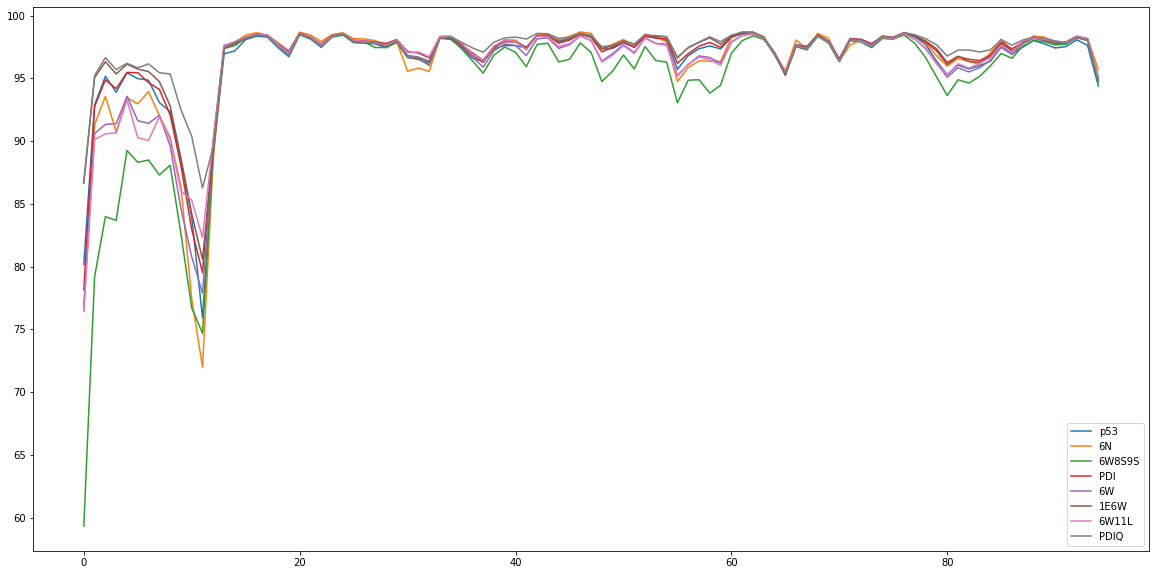

In [53]:
###single-peptide
binder=['p53','6N','6W8S9S','PDI','6W','1E6W','6W11L','PDIQ']
binder_seq = ['ETFSDLWKLLPE','LTFEHNWAQLTS','LTFEHWWSSLTS','LTFEHYWAQLTS','LTFEHWWAQLTS','ETFEHWWAQLTS','LTFEHWWAQLLS','ETFEHWWSQLLS']

# for ii in range(1,2):
all_plddt=[]
plt.figure(figsize=(20,10))
for i in binder:
#     if i !='PDIQ':
#         for j in range(5):
    tmp_plddt=[]
    top1=open(glob.glob(f'./{i}_mdm2/result_r_msa_uniref_custom_mono_dist/seq_unrelaxed_rank_{ii}_model_*.pdb')[0],'r').readlines()
    atom_plddt=[float([j for j in k.split(" ") if j != ""][-3]) for k in top1 if k[:4]=='ATOM' and k[13:15]=='CA']
    all_plddt.append(atom_plddt)
for i in range(8):
    if binder[i]=='PDIQ' or binder[i]=='1E6W':
        all_plddt[i]=all_plddt[i][83:]+all_plddt[i][:83]
        plt.plot(all_plddt[i],'-',label=binder[i])
        plt.legend()
    else:
        plt.plot(all_plddt[i],label=binder[i])
        plt.legend()


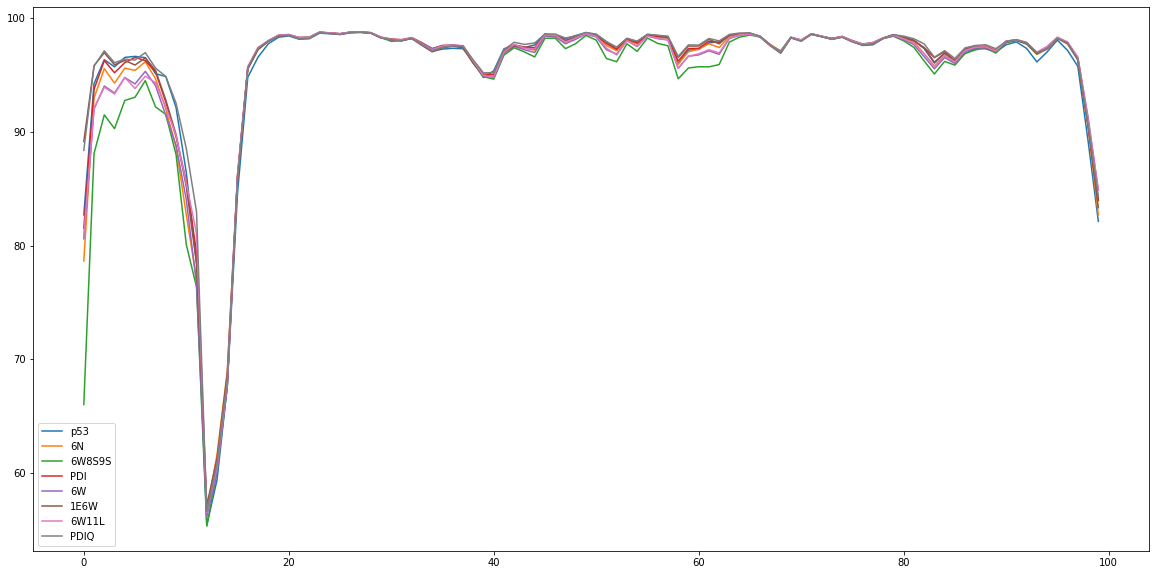

In [60]:
binder=['p53','6N','6W8S9S','PDI','6W','1E6W','6W11L','PDIQ']
binder_seq = ['ETFSDLWKLLPE','LTFEHNWAQLTS','LTFEHWWSSLTS','LTFEHYWAQLTS','LTFEHWWAQLTS','ETFEHWWAQLTS','LTFEHWWAQLLS','ETFEHWWSQLLS']

all_plddts=[]
plt.figure(figsize=(20,10))
for i in binder:
#     if i !='PDIQ':
#         for j in range(5):
    tmp_plddt=[]
    top1=open(glob.glob(f'./{i}_mdmx/result_r_msa_uniref_custom_mono_dist/seq_unrelaxed_rank_1_model_*.pdb')[0],'r').readlines()
    atom_plddt=[float([j for j in k.split(" ") if j != ""][-3]) for k in top1 if k[:4]=='ATOM' and k[13:15]=='CA']
    all_plddts.append(atom_plddt)
for i in range(8):
    if binder[i]=='PDIQ' or binder[i]=='1E6W':
#         pass
        all_plddts[i]=all_plddts[i][88:]+all_plddts[i][:88]
        plt.plot(all_plddts[i],'-',label=binder[i])
        plt.legend()
    else:
        plt.plot(all_plddts[i],label=binder[i])
        plt.legend()
            

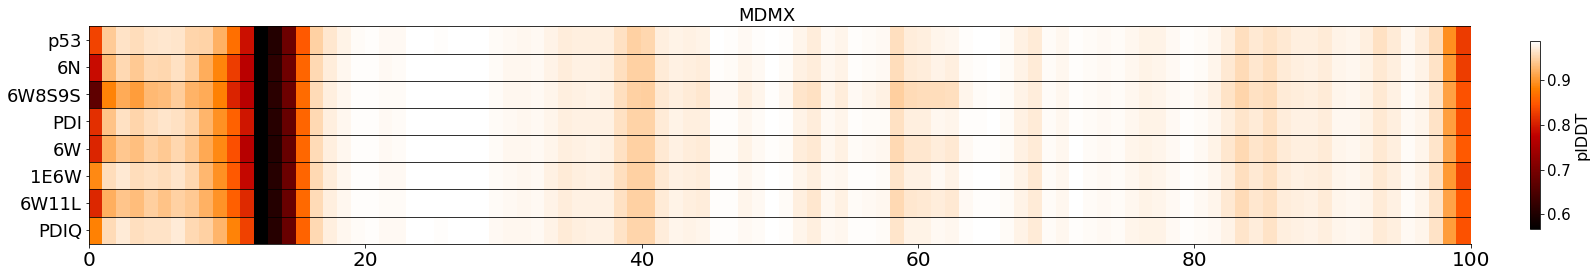

In [63]:
fig,ax=plt.subplots(8,2,figsize=(26,4),sharex=True,gridspec_kw={'width_ratios': [20,1]})
labels = binder#['p53','6N','6W8S9S','PDI','6W','1E6W','6W11L']
for i in range(8):
    bar=ax[i][0].pcolor(np.array(all_plddts[i],dtype=np.float32).reshape(1,len(all_plddts[i]))/100,cmap='gist_heat')
    ax[i][1].tick_params(axis='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)
    ax[i][0].set_xticklabels(range(0,120,20),fontsize=20)
    ax[i][0].set_yticks([0.5])
    ax[i][0].set_yticklabels([labels[i]],fontsize=18)
    ax[i][1].spines['top'].set_visible(False)
    ax[i][1].spines['right'].set_visible(False)
    ax[i][1].spines['bottom'].set_visible(False)
    ax[i][1].spines['left'].set_visible(False)

ax[6][0].set_xlabel('Residue index',fontsize=25)
# ax[0][0].text(99,1.2,'PDIQ',fontsize=18)
ax[0][0].text(47,1.2,'MDMX',fontsize=18)
cbar=plt.colorbar(bar,ax=ax[:,1],label='plDDT')
cbar.ax.tick_params(labelsize=15)
ax = cbar.ax
text = ax.yaxis.label
# ax.yaxis.set_ticks_position('left')
font = matplotlib.font_manager.FontProperties(size=16)
text.set_font_properties(font)
# labels = [item.get_text() for item in ax.get_yticklabels()]
# ax.set_yticklabels(labels,fontsize=12)
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('./single_binder_plddt_mdmx.pdf',bbox_inches = "tight")


# plDDT for competitive binding with PDIQ

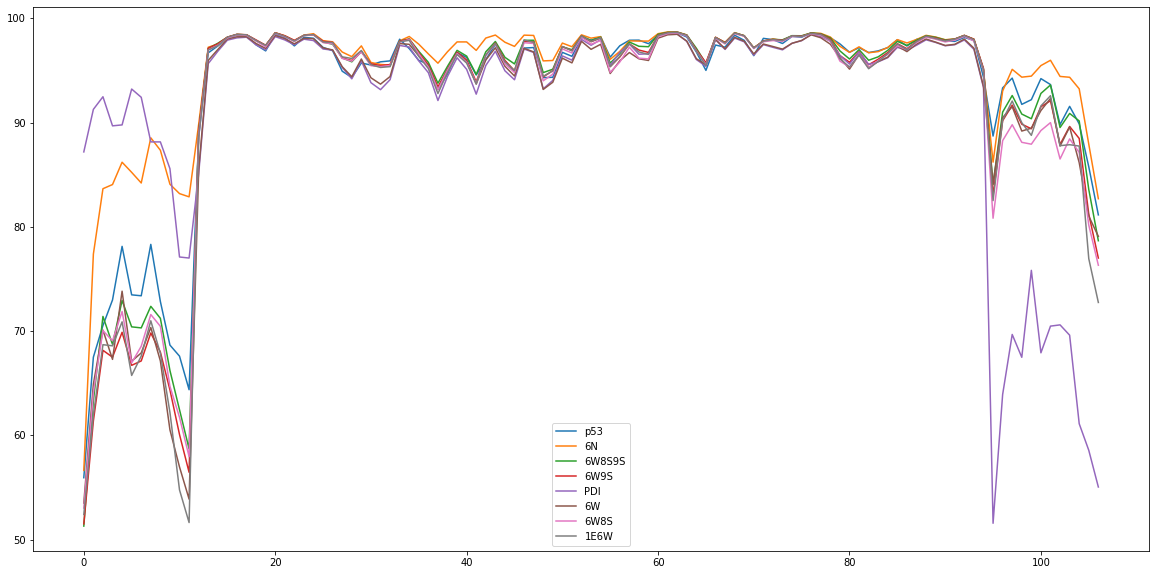

In [26]:
all_plddt=[]
plt.figure(figsize=(20,10))
for i in binder:
    if i !='PDIQ':
        tmp_plddt=[]
        top1=open(glob.glob(f'./{i}_PDIQ_mdm2/result_r_msa_uniref_custom_mono_01/seq_r_msa_uniref_custom_unrelaxed_rank_1*.pdb')[0],'r').readlines()
        atom_plddt=[float([j for j in k.split(" ") if j != ""][-3]) for k in top1 if k[:4]=='ATOM' and k[13:15]=='CA']
        all_plddt.append(atom_plddt)
for i in range(8):
    if binder[i]=='PDIQ':# or binder[i]=='1E6W':
        pass
#         plt.plot(all_plddt[i][111:]+all_plddt[i][:111],'--',label=binder[i])
#         plt.legend()
    else:
        plt.plot(all_plddt[i],label=binder[i])
        plt.legend()


In [38]:
top1[2][13:15]

'CA'

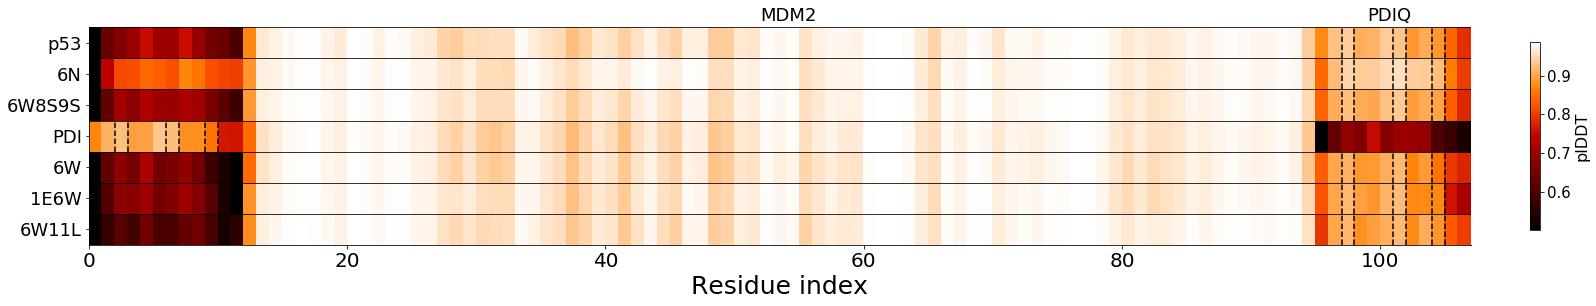

In [157]:
fig,ax=plt.subplots(7,2,figsize=(26,4),sharex=True,gridspec_kw={'width_ratios': [20,1]})
labels = ['p53','6N','6W8S9S','PDI','6W','1E6W','6W11L']
for i in range(7):
    bar=ax[i][0].pcolor(np.array(all_plddt[i],dtype=np.float32).reshape(1,len(all_plddt[i]))/100,cmap='gist_heat')
    ax[i][1].tick_params(axis='both',left=False,right=False,bottom=False,labelleft=False,labelright=False,labelbottom=False)
    ax[i][0].set_xticklabels(range(0,120,20),fontsize=20)
    ax[i][0].set_yticks([0.5])
    ax[i][0].set_yticklabels([labels[i]],fontsize=18)
    ax[i][1].spines['top'].set_visible(False)
    ax[i][1].spines['right'].set_visible(False)
    ax[i][1].spines['bottom'].set_visible(False)
    ax[i][1].spines['left'].set_visible(False)
    if i !=3:
        ax[i][0].plot([97,97],[0,1],color='k',linestyle='--')
        ax[i][0].plot([98,98],[0,1],color='k',linestyle='--')
        ax[i][0].plot([101,101],[0,1],color='k',linestyle='--')
        ax[i][0].plot([102,102],[0,1],color='k',linestyle='--')
        ax[i][0].plot([104,104],[0,1],color='k',linestyle='--')
        ax[i][0].plot([105,105],[0,1],color='k',linestyle='--')
    else:
        ax[i][0].plot([2,2],[0,1],color='k',linestyle='--')
        ax[i][0].plot([3,3],[0,1],color='k',linestyle='--')
        ax[i][0].plot([6,6],[0,1],color='k',linestyle='--')
        ax[i][0].plot([7,7],[0,1],color='k',linestyle='--')
        ax[i][0].plot([9,9],[0,1],color='k',linestyle='--')
        ax[i][0].plot([10,10],[0,1],color='k',linestyle='--')        

ax[6][0].set_xlabel('Residue index',fontsize=25)
ax[0][0].text(99,1.2,'PDIQ',fontsize=18)
ax[0][0].text(52,1.2,'MDM2',fontsize=18)
cbar=plt.colorbar(bar,ax=ax[:,1],label='plDDT')
cbar.ax.tick_params(labelsize=15)
ax = cbar.ax
text = ax.yaxis.label
# ax.yaxis.set_ticks_position('left')
font = matplotlib.font_manager.FontProperties(size=16)
text.set_font_properties(font)
# labels = [item.get_text() for item in ax.get_yticklabels()]
# ax.set_yticklabels(labels,fontsize=12)
plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig('./PDIQ_rank1_plddt.pdf',bbox_inches = "tight")
